<a href="https://colab.research.google.com/github/Jcasttrop/Data-Analysis-for-Brazilian-E-commerce/blob/main/Word_Cloud_y_Sentimental_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stylecloud

In [5]:
import stylecloud 
import pandas as pd

Para hacer una nube de palabras debemos sacar un texto que contenga las palabras que tenemos. Para ello, nosotros debemos extraerlas de nuestra tabla de reviews; y hacer una extracción }

In [6]:
df = pd.read_csv("/content/olist_order_reviews_dataset.csv")
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
M3 = df[(df['review_score'] < 3)]
M3

Texto = M3["review_comment_message"].copy()
Texto


#Texto.shape -> 1475 registros
#Texto.isna().sum() -> 3685 no tienen palabras


#Hay que eliminar los Nan+

FinalTxt = Texto.dropna()
#FinalTxt.isna().sum() -> Ahotra hay 0 Nan

FinalTxt

16       GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...
19                                                 Péssimo
29                     Não gostei ! Comprei gato por lebre
32       Sempre compro pela Internet e a entrega ocorre...
39                            Nada de chegar o meu pedido.
                               ...                        
99155    Eu recebi o seguinte email e preciso saber com...
99169    Boa tarde. \r\nNão recebo todos os produtos fa...
99200    Foto muito diferente principalmente a graninha...
99203    Tive um problema na entrega em que o correio c...
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 10890, dtype: object

In [8]:
#Ahora necesitamos convertilo a un txt

Txt = FinalTxt.to_csv()
Txt


Archivo = open("palabras.csv", "w")
Archivo.write(Txt)
Archivo.close()

Ahora sí, generamos nuestra nube de datos

In [9]:
stylecloud.gen_stylecloud(Txt,
                          icon_name="fab fa-apple",
                          colors="white",
                          background_color="black",
                          collocations="False")

/content/stylecloud.png

In [38]:
#Necesitamos hacer los stopwords

#!pip install stop_words

import re


import string

from stop_words import get_stop_words

Stop_words = get_stop_words("portuguese")

#Si queremos añadir palabras irrelevantes, debemos poner
Stop_words.append("PRODUTO")
Stop_words.append("COMPREI")
Stop_words.append("RECEBI")
Stop_words.append("POIS")
Stop_words.append("PRA")

punctuationList = list(string.punctuation)

stopwordsList = Stop_words + punctuationList + ['“','”','¡','¿',"''",'``','...','→','⬥','…'] 

In [39]:
stylecloud.gen_stylecloud(Txt,
                          icon_name="fab fa-apple",
                          colors="white",
                          background_color="black",
                          output_name="SW.png",
                          collocations="False",
                          custom_stopwords=stopwordsList)

/content/SW.png

### Tal vez buscando las common words

In [30]:
from collections import Counter

In [32]:
split_it = Txt.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(4)

print(most_occur)

#Pues... 

[('o', 6919), ('e', 5962), ('não', 5440), ('de', 4738)]


In [33]:
Subs = FinalTxt.copy()

Subs.

## Analisis de sentimientos

In [13]:
import nltk
nltk.downloader.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

ss = pd.read_csv("/content/palabras.csv")

ss["Sentimiento"] = ss["review_comment_message"].apply(lambda i: sid.polarity_scores(i)["compound"])
MenSen = ss.to_csv("mensajes_consentimientos.csv")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


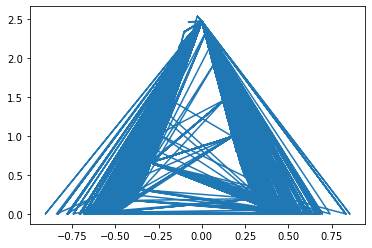

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 


mean = ss["Sentimiento"].mean()
std = ss["Sentimiento"].std()

plt.plot(ss["Sentimiento"], norm.pdf(ss["Sentimiento"], mean, std)) 
plt.show() 

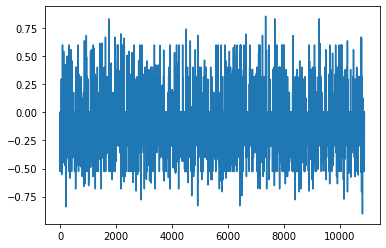

In [19]:
x = ss["Sentimiento"]

plt.plot(x)